
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 400.  Construct portfolios from the 400 stocks in the S&P 400 mid cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp400-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,ACHC,Acadia Healthcare,US Stocks:Healthcare,42.62,219.16,57.92,16.05,-0.65,26.93,11.93,49.20,16.05,0.33
1,ACIW,ACI Worldwide,US Stocks:Technology,116.69,112.18,16.49,25.75,20.47,27.99,13.10,31.52,25.75,0.82
2,ATGE,Adtalem Global Education,US Stocks:Consumer Discretionary,415.72,455.07,23.95,-2.88,19.49,34.22,14.62,39.06,-2.88,-112.49
3,ACM,AECOM,US Stocks:Industrials,-28.80,56.39,11.78,15.34,17.36,32.99,20.00,35.60,15.34,0.43
4,AMG,Affiliated Managers Group,US Stocks:Financials,3471.45,776.30,74.67,-6.16,4.43,67.04,12.24,39.41,-6.16,-242.77
5,ADS,Alliance Data Systems Corp,US Stocks:Technology,598.30,136.85,-15.73,-27.96,-12.47,60.06,25.07,64.67,-27.96,-1808.17
6,ACC,American Campus Communities,US Stocks:Real Estate,75.91,46.13,-3.67,12.28,4.17,20.59,9.62,31.09,12.28,0.39
7,AEO,American Eagle Outfitters,US Stocks:Consumer Discretionary,162.78,457.48,71.71,14.96,16.28,37.17,19.38,44.74,14.96,0.33
8,AFG,American Financial Group,US Stocks:Financials,686.19,187.43,-2.36,4.13,14.71,71.56,23.22,28.09,4.13,0.15
9,AGCO,AGCO,US Stocks:Industrials,71.31,221.74,79.48,22.07,22.03,48.73,25.98,30.96,22.07,0.71


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=1)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
366,WTRG,Essential Utilities,US Stocks:Utilities,5.36,37.50,-7.20,16.09,11.17,17.09,11.79,19.00,16.09,0.85
289,SEDG,"Solaredge Technologies, Inc.",US Stocks:Technology,-67.71,260.52,202.18,114.97,65.57,82.68,58.95,52.61,114.97,2.19
271,REXR,"Rexford Industrial Realty, Inc.",US Stocks:Real Estate,145.94,30.35,1.76,26.51,28.06,28.88,14.25,18.13,26.51,1.46
18,ATR,AptarGroup Inc,US Stocks:Materials,50.76,84.86,24.91,22.27,15.58,23.64,15.59,17.62,22.27,1.26
125,GNRC,Generac Holdings Inc.,US Stocks:Industrials,110.97,150.81,151.78,81.36,58.30,44.76,24.24,31.11,81.36,2.62
270,RGEN,Repligen,US Stocks:Healthcare,111.14,70.52,108.35,92.08,59.32,48.04,32.16,34.63,92.08,2.66
29,BRO,Brown & Brown,US Stocks:Financials,-37.49,-6.32,-3.89,22.78,24.71,29.92,19.25,20.60,22.78,1.11
158,INT,World Fuel Services Corp,US Stocks:Energy,128.28,209.24,-9.43,13.40,-0.18,50.08,22.56,46.65,13.40,0.29
281,SAM,Boston Beer Company,US Stocks:Consumer Staples,868.72,99.33,182.30,84.47,44.31,50.65,22.04,47.35,84.47,1.78
82,DECK,Deckers Outdoor Corporation,US Stocks:Consumer Discretionary,-20.26,151.46,65.96,52.37,45.28,44.80,30.80,31.67,52.37,1.65


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,WTRG,SEDG,REXR,ATR,GNRC,RGEN,BRO,INT,SAM,DECK,CABO,Ranked Portfolio
Annual Returns,16.09,114.97,26.51,22.27,81.36,92.08,22.78,13.40,84.47,52.37,46.56,42.15
Std Dev,19.00,52.61,18.13,17.62,31.11,34.63,20.60,46.65,47.35,31.67,25.46,25.22
Sharpe Ratio,0.85,2.19,1.46,1.26,2.62,2.66,1.11,0.29,1.78,1.65,1.83,1.67
Weight,0.16,0.03,0.13,0.12,0.08,0.06,0.10,0.08,0.09,0.06,0.09,1.00
Worst Typical Down Year,-21.91,9.75,-9.75,-12.97,19.14,22.82,-18.42,-79.90,-10.23,-10.97,-4.36,-8.29
Black Swan,-40.91,-42.86,-27.88,-30.59,-11.97,-11.81,-39.02,-126.55,-57.58,-42.64,-29.82,-33.51


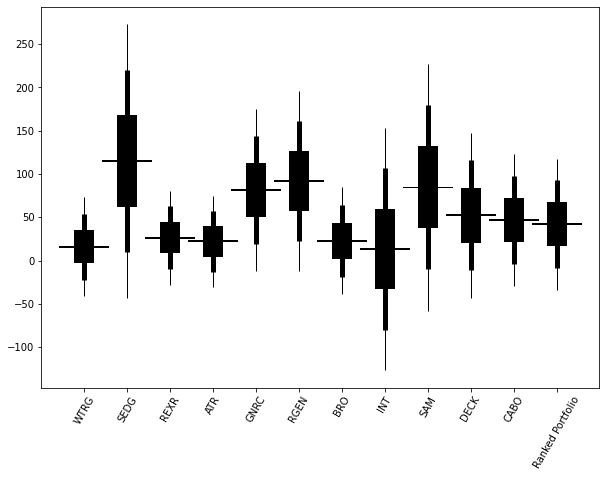

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

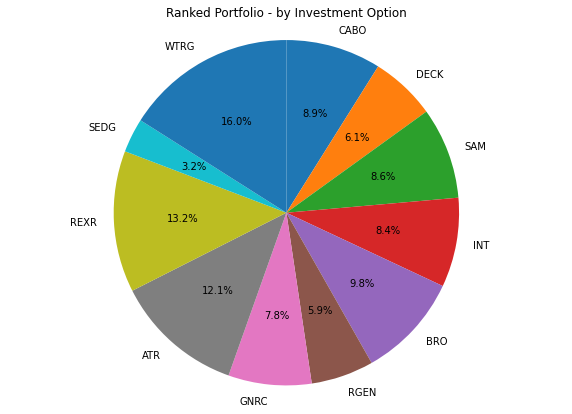

CABO   0.09
DECK   0.06
SAM    0.09
INT    0.08
BRO    0.10
RGEN   0.06
GNRC   0.08
ATR    0.12
REXR   0.13
SEDG   0.03
WTRG   0.16



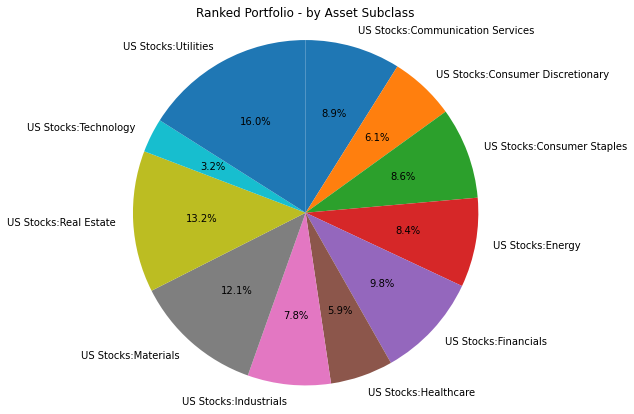

US Stocks:Communication Services   0.09
US Stocks:Consumer Discretionary   0.06
US Stocks:Consumer Staples         0.09
US Stocks:Energy                   0.08
US Stocks:Financials               0.10
US Stocks:Healthcare               0.06
US Stocks:Industrials              0.08
US Stocks:Materials                0.12
US Stocks:Real Estate              0.13
US Stocks:Technology               0.03
US Stocks:Utilities                0.16



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    WTRG                           0.1601
    SEDG                           0.0320
    REXR                           0.1325
    ATR                            0.1211
    GNRC                           0.0779
    RGEN                           0.0587
    BRO                            0.0981
    INT                            0.0837
    SAM                            0.0856
    DECK                           0.0613
    CABO                           0.0892


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer..........

Ranked Portfolio Metrics:           
    max_sharpe_ratio            2.42
    annual_return              66.77
    std_dev                    27.55
    worst typical down year    11.66
    black_swan                -15.89


Ranked Portfolio Weights:
    WTRG                           0.0400
    SEDG                           0.0300
    REXR                           0.0700
    ATR                            0.0000
    GNRC                           0.2600
    RGEN                           0.2500
    BRO                            0.0000
    INT                            0.0000
    SAM                            0.0000
    DECK                           0.0600
    CABO                           0.2900



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).